1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

2. Load the Data

In [ ]:
churn_data= pd.read_excel('customer_churn-1.csv')

In [ ]:
Data =churn_data.copy()

In [ ]:
Data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
Data.shape

(7043, 21)

In [ ]:
Data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
Data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [ ]:
Data.duplicated().sum()

np.int64(0)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [ ]:
Cat_cols = Data.select_dtypes(include=['object']).columns

for col in Cat_cols:
  print(f"value counts for {col}")
  print(Data[col].value_counts())

value counts for customerID
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
value counts for gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
value counts for Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
value counts for Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
value counts for PhoneService
PhoneService
Yes    6349
No      681
Name: count, dtype: int64
value counts for MultipleLines
MultipleLines
No                  3382
Yes                 2967
No phone service     681
Name: count, dtype: int64
value counts for InternetService
InternetService
Fiber optic    3081
DSL            2407
No             1518
Name: count, dtype: int64
value counts for OnlineSecurity
OnlineSecurity
No                     3492
Yes                    2013
No intern

In [ ]:
Data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

3. Exploratory Data Analysis (EDA)

In [ ]:
Data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
Data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [ ]:
Data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Remove Duplicates

# For Numeric Columns
Data['SeniorCitizen'].fillna(Data['SeniorCitizen'].mode()[0],inplace=True)
Data['tenure'].fillna(Data['tenure'].median(),inplace=True)
Data['MonthlyCharges'].fillna(Data['MonthlyCharges'].mean(),inplace=True)

In [ ]:
# For Categorical Columns
for column in ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','TotalCharges']:
       Data[column].fillna(Data[column].mode()[0], inplace=True)

Univariate Analysis



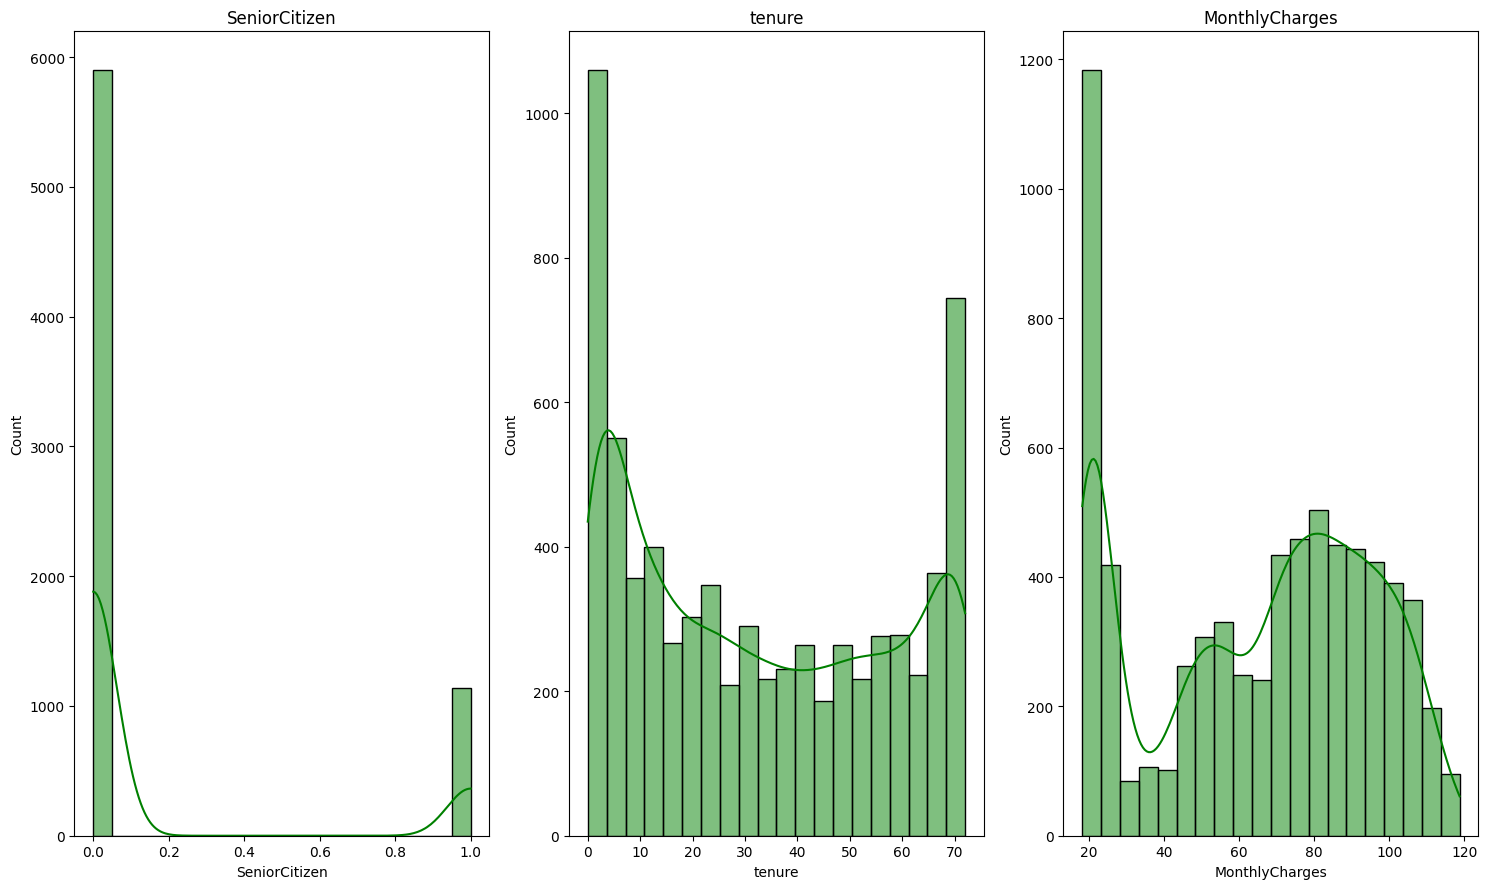

In [ ]:
num_col = Data.select_dtypes(include=['number']).columns

cols_per_row = 3
rows = math.ceil(len(num_col)/(cols_per_row))

fig,axis = plt.subplots(rows,cols_per_row,figsize=(15,9))
axis = axis.flatten()

for i,col in enumerate(num_col):
  sns.histplot(Data[col],kde=True,bins=20,color='green',ax=axis[i])
  axis[i].set_title(col)
for j in range (len(num_col),len(axis)):
  fig.delaxes(axis[j])
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Customer churn Distribution')

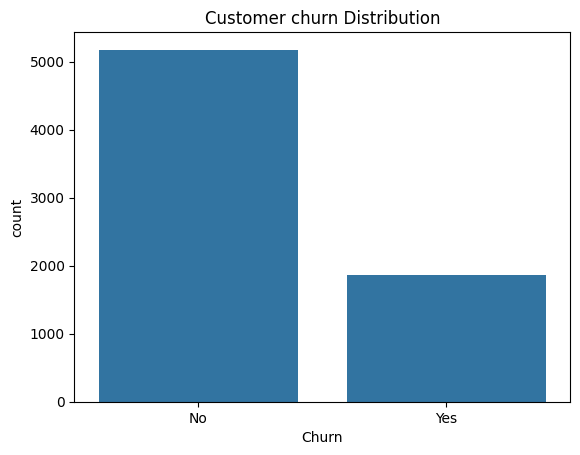

In [ ]:
# Churn Distribution
sns.countplot(x='Churn',data=Data)
plt.title('Customer churn Distribution')

Bivariate Analysis



Text(0.5, 1.0, 'MonthlyCharges vs Churn')

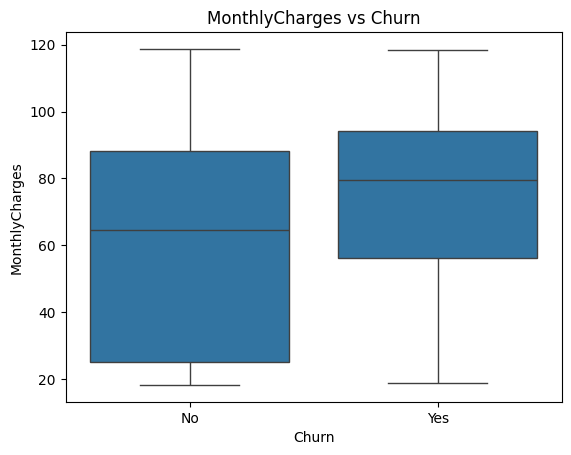

In [ ]:
# MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=Data)
plt.title('MonthlyCharges vs Churn')

Text(0.5, 1.0, 'Churn by Contract Type')

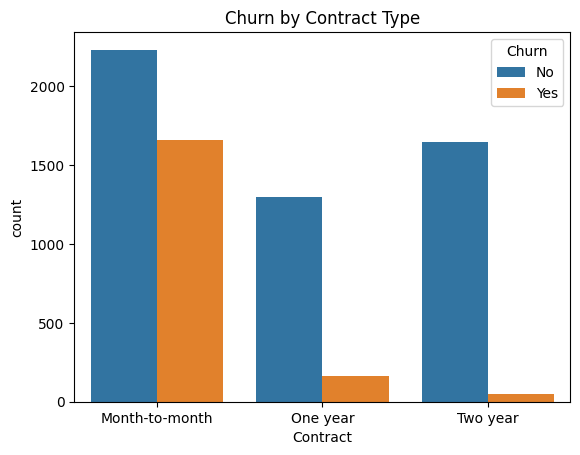

In [ ]:
# Contract type and Churn
sns.countplot(x='Contract', hue='Churn', data=Data)
plt.title('Churn by Contract Type')

Categorical vs Categorical variables

In [ ]:
Cat_cols = Data.select_dtypes(include=['object']).columns
target_cols = 'Churn'

for col in Cat_cols:
  if col != target_cols:
    print(f"cross-tab between {col} and {target_cols}")
    ct=pd.crosstab(Data[col],Data[target_cols],normalize='index')*100
    print(ct.round(2))

cross-tab between customerID and Churn
Churn          No    Yes
customerID              
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7043 rows x 2 columns]
cross-tab between gender and Churn
Churn      No    Yes
gender              
Female  73.08  26.92
Male    73.84  26.16
cross-tab between Partner and Churn
Churn       No    Yes
Partner              
No       67.04  32.96
Yes      80.34  19.66
cross-tab between Dependents and Churn
Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.55  15.45
cross-tab between PhoneService and Churn
Churn            No    Yes
PhoneService              
No            75.18  24.82
Yes           73.28  26.72
cross-tab between MultipleLines and Churn
Churn                No    Yes
Multipl

Outlier Detection

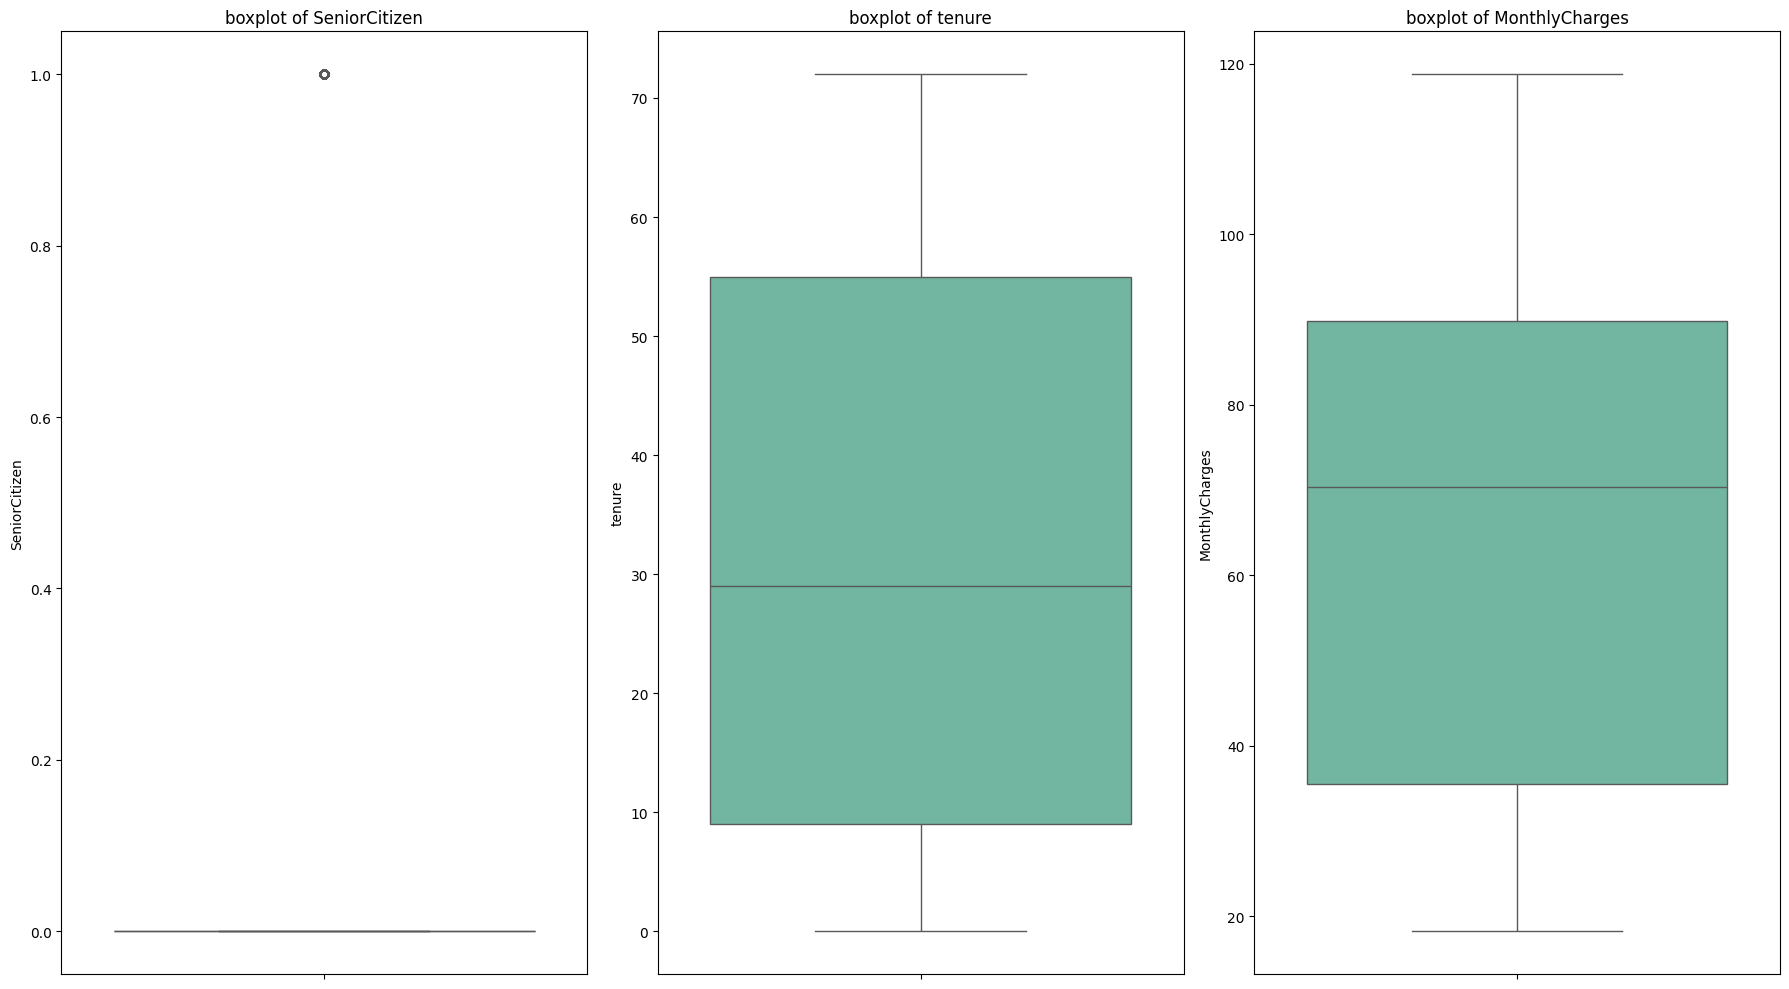

In [ ]:
num_col = [col for col in Data.select_dtypes(include=['number']).columns if col not in 'Churn']
cols_per_row = 3
rows = math.ceil(len(num_col)/(cols_per_row))
fig,axis = plt.subplots(rows,cols_per_row,figsize=(18,10))
axis = axis.flatten()

for i, col in enumerate(num_col):
  sns.boxplot(data=Data,y=col,ax=axis[i],palette='Set2')
  axis[i].set_title(f"boxplot of {col}")

for j in range (len(num_col),len(axis)):
  fig.delaxes(axis[j])
plt.tight_layout()
plt.show()

4. Feature Engineering

In [ ]:
Data['TotalCharges']=pd.to_numeric(Data['TotalCharges'],errors='coerce')
Data.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

Data_encoded = Data.copy()
label_encoder = LabelEncoder()

for col in Data_encoded.columns:
  if Data_encoded[col].dtype == 'object':
    Data_encoded[col] = label_encoder.fit_transform(Data_encoded[col].astype(str))
Data_encoded = Data.copy()
label_encoder = LabelEncoder()

for col in Data_encoded.columns:
  if Data_encoded[col].dtype == 'object':
    Data_encoded[col] = label_encoder.fit_transform(Data_encoded[col].astype(str))

Text(0.5, 1.0, 'Correlation Heatmap')

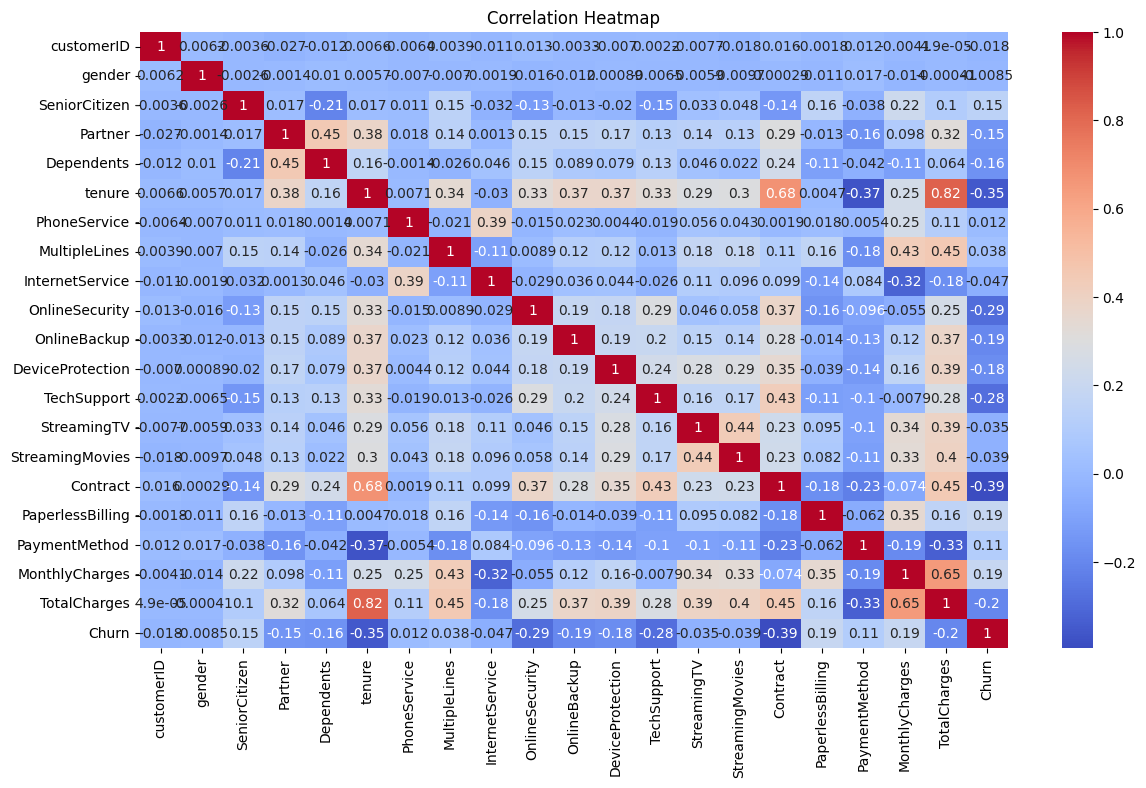

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(Data_encoded.corr(),cmap="coolwarm",annot=True)
plt.title('Correlation Heatmap')

6. Model Building

In [ ]:
from sklearn.model_selection import train_test_split

X= Data_encoded.drop('Churn', axis=1)
y = Data_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


Train Multiple Models for comparison

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.2f}")
    print(classification_report(y_test, preds))


Logistic Regression Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Random Forest Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.67      0.47      0.55       374

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407

SVM Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42  

# Random Forest

Text(0.5, 1.0, 'Top 10 Important Features')

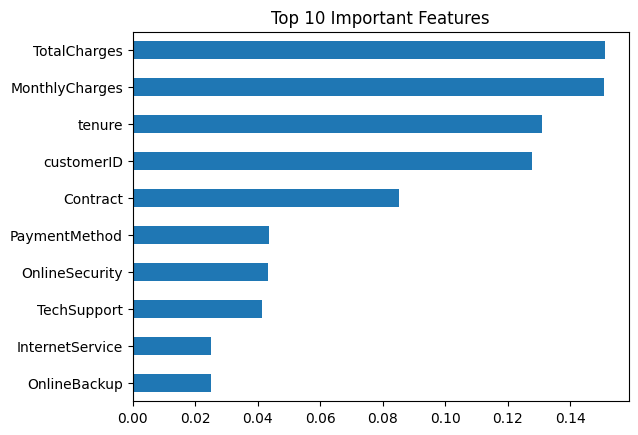

In [ ]:
import numpy as np

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().tail(10).plot(kind='barh')
plt.title("Top 10 Important Features")

8. Insights

* Month-to_month customers are far more likely to churn.
* Customers with low tenure have highe churn rates
* Electronic check users churn more than others.
* Customers with low usage o basic services are more likely to churn.
